In [6]:
%load_ext autoreload
%autoreload 2
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pickle
import pdb

sys.path.append('..')

from postprocess import postprocess_dir
from utils import gen_covariance, gen_beta2, gen_data, selection_accuracy
from misc import calc_avg_cov, calc_clustering, get_cov_list

from pyuoi.linear_model.lasso import UoI_Lasso

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
# %load ../datgen.py
n_features = 50
n_samples = 150

In [23]:
# First sanity check: The selection accuracy increase is not due to the union operation
with open('union_results.dat', 'rb') as f:
    sa = pickle.load(f)
    sa_alt = pickle.load(f)
    sa_max_estimates = pickle.load(f)
    sa_alt_max_estimates = pickle.load(f)

In [56]:
# Mean and variance of selection accuracies of the "best estimates"
max_estimates_mean = np.zeros(len(sa_max_estimates))
max_estimates_var = np.zeros(len(sa_max_estimates))

alt_estimates_mean = np.zeros(len(sa_alt_max_estimates))
alt_estimates_var = np.zeros(len(sa_alt_max_estimates))

for i in range(len(sa_max_estimates)):
    sa_idx = np.argmax(sa[i, :])
    alt_idx = np.argmax(sa_alt[i, :])
    
    max_estimates_mean[i] = np.mean(sa_max_estimates[i][sa_idx])
    max_estimates_var[i] = np.std(sa_max_estimates[i][sa_idx])
    
    alt_estimates_mean[i] = np.mean(sa_alt_max_estimates[i][alt_idx])
    alt_estimates_var[i] = np.std(sa_alt_max_estimates[i][alt_idx])

<ErrorbarContainer object of 3 artists>

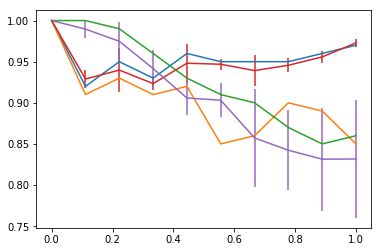

In [57]:
plt.plot(s, np.max(sa, axis = 1))
plt.plot(s, sa[:, -1])
plt.plot(s, np.max(sa_alt, axis = 1))

plt.errorbar(s, max_estimates_mean, yerr = max_estimates_var)
plt.errorbar(s, alt_estimates_mean, yerr = alt_estimates_var)

In [ ]:
# We pass the first sanity check, but it seems like now evaluation on the TRAIN data seems to do better. What's going on here?

# Second independent iteration:

In [58]:
# First sanity check: The selection accuracy increase is not due to the union operation
with open('union_results2.dat', 'rb') as f:
    sa = pickle.load(f)
    sa_alt = pickle.load(f)
    sa_max_estimates = pickle.load(f)
    sa_alt_max_estimates = pickle.load(f)

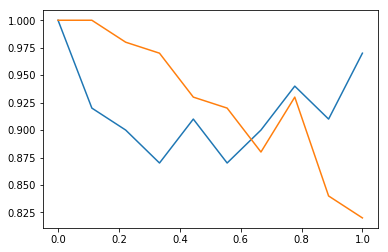

In [60]:
plt.plot(s, np.max(sa, axis = 1))
plt.plot(s, np.max(sa_alt, axis = 1))

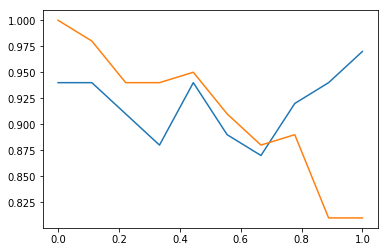

In [62]:
with open('union_results3.dat', 'rb') as f:
    sa = pickle.load(f)
    sa_alt = pickle.load(f)
    sa_max_estimates = pickle.load(f)
    sa_alt_max_estimates = pickle.load(f)
    
plt.plot(s, np.max(sa, axis = 1))
plt.plot(s, np.max(sa_alt, axis = 1))

In [64]:
np.argmax(sa, axis = 1)

array([62, 49, 30, 46, 43, 22, 29, 24,  0,  0], dtype=int64)

In [65]:
np.log(150)

5.0106352940962555

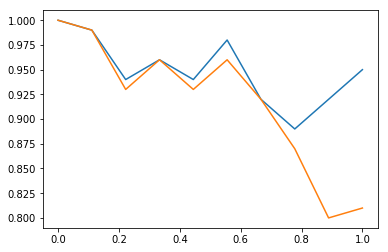

In [63]:
# Second sanity check: Does expanding the range of the manual penalty lead to similar performance between train and test data 
# penalties?
with open('large_penalty.dat', 'rb') as f:
    sa = pickle.load(f)
    sa_alt = pickle.load(f)
 
plt.plot(s, np.max(sa, axis = 1))
plt.plot(s, np.max(sa_alt, axis = 1))

In [ ]:
# important implications: Using larger penalties is the way to go!

In [ ]:
# Next questions
# 1) Asymptotics. The question is then the following: Does this oracle penalty provide a better approximation to the 
# asymptotic estimation of model risk?
# 2) Does good risk estimation provide for good selection accuracy for models selected with 

In [ ]:
# First task: need to establish the right correspondence between AIC/MIC and our expressions for exact risk
